In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Objects to Datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
type(df['job_type_skills'][1])

str

In [6]:
df['job_type_skills'] = (df['job_type_skills'].apply(lambda skills: ast.literal_eval(skills) 
                             if pd.notna(skills) else skills))

In [14]:
df['job_skills'] = (df['job_skills'].apply(lambda skills: ast.literal_eval(skills) 
                             if pd.notna(skills) else skills))

In [13]:
df.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
149046,Data Scientist,Ai/ml/data Scientist,"Pune, Maharashtra, India",via BeBee India,Full-time,False,India,2023-12-01 08:15:39,False,False,India,None,NaN,NaN,NITI TECHNOLOGIES INDIA,"['python', 'keras', 'pytorch', 'tensorflow']","{'libraries': ['keras', 'pytorch', 'tensorflow..."


In [16]:
df = df.drop(0)

In [18]:
df = df.explode('job_skills')

In [38]:
skill_counts = df.groupby(['job_title_short','job_skills']).size()
df_skills_count = skill_counts.reset_index(name='Skill Counts').sort_values(by='Skill Counts', ascending=False)
df_skills_count

,job_title_short,job_skills,Skill Counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


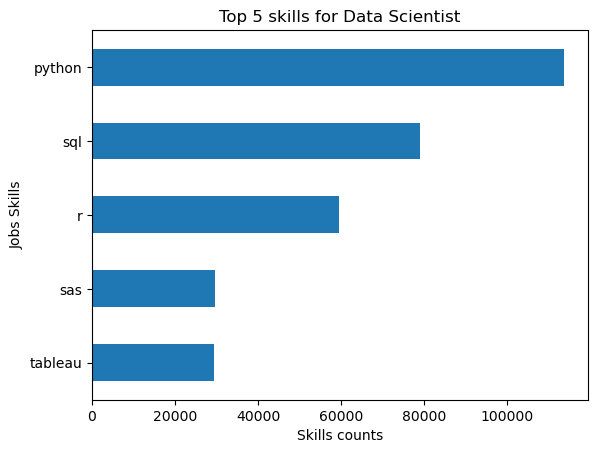

In [49]:
job_titles = 'Data Scientist'
top_skills = 5

df_skills_count = df_skills_count[df_skills_count['job_title_short'] == job_titles].head(top_skills)

df_skills_count.plot(kind='barh', x='job_skills', y='Skill Counts')
plt.gca().invert_yaxis()
plt.title(f"Top {top_skills} skills for {job_titles}")
plt.xlabel('Skills counts')
plt.ylabel('Jobs Skills')
plt.legend().set_visible(False)
plt.show()